### Guassian Naive Bayes Classifier Usecase Titanic Dataset

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Titanic_Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (891, 12)


In [5]:
df.ndim

2

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

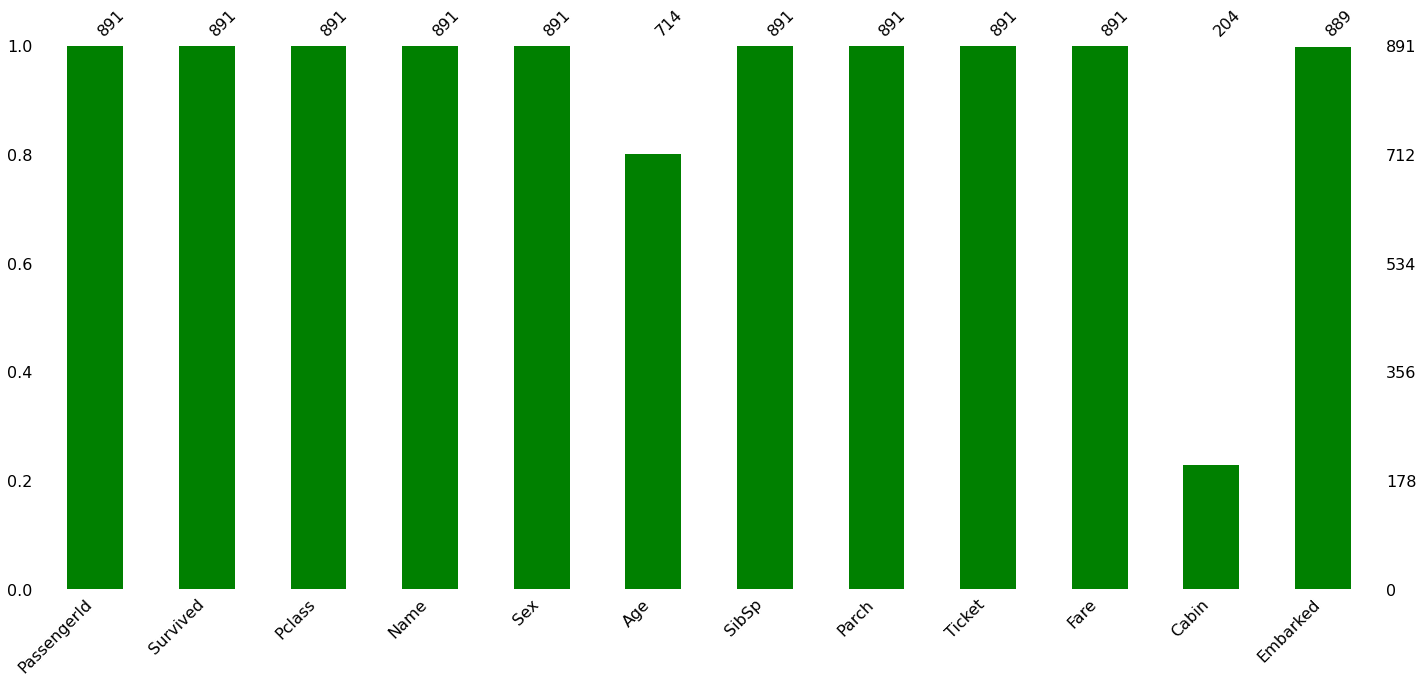

In [11]:
import missingno as msno
msno.bar(df,color = "g")
plt.show()

In [12]:
df["Age"].fillna(df["Age"].mean(),inplace = True)

In [13]:
df["Cabin"].fillna(df["Cabin"].value_counts().index[1],inplace = True)

In [14]:
df["Embarked"].fillna(df['Embarked'].value_counts().index[0],inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

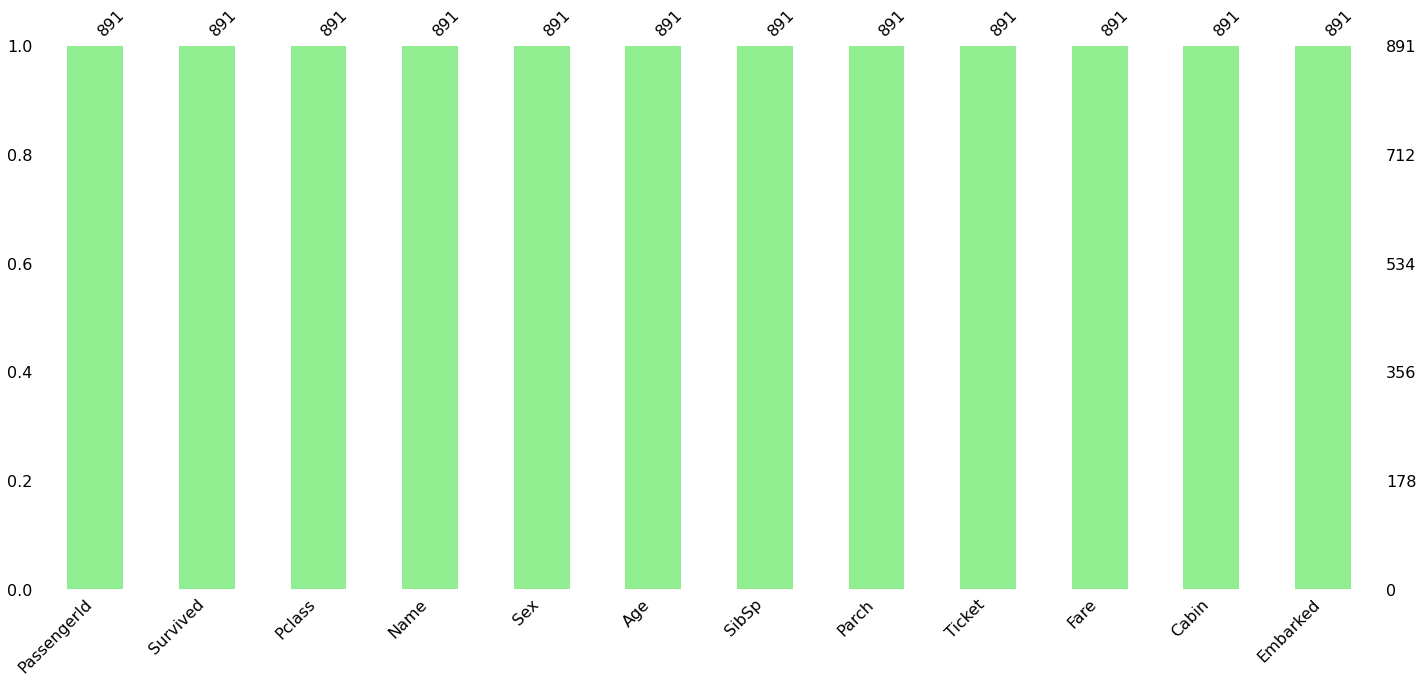

In [16]:
msno.bar(df,color = "lightgreen")
plt.show()

### Visualization

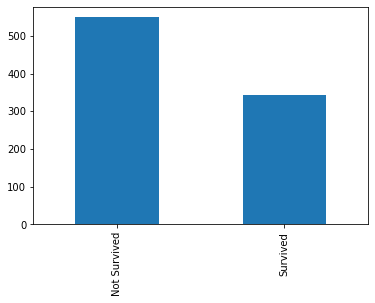

In [17]:
df["Survived"] = df["Survived"].map({0:"Not Survived",1:"Survived"})
df['Survived'].value_counts().plot(kind = "bar")
plt.show()

In [18]:
import warnings 
warnings.simplefilter("ignore")

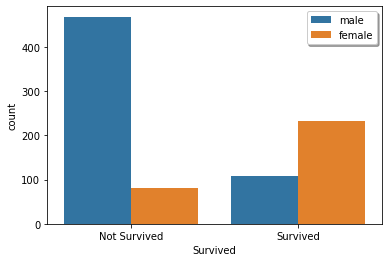

In [19]:
sns.countplot(df["Survived"],hue =df["Sex"],data = df)
plt.legend(shadow = 1)
plt.show()

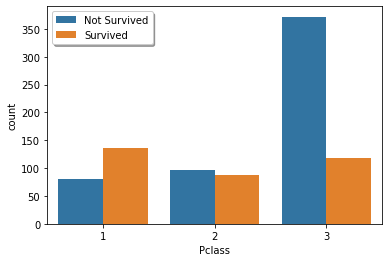

In [20]:
sns.countplot(df["Pclass"],hue =df["Survived"],data = df)
plt.legend(shadow = 1)
plt.show()

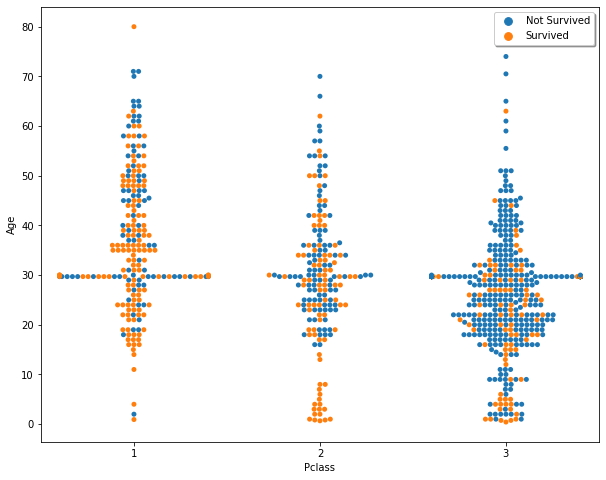

In [21]:
plt.figure(figsize = (10,8))
sns.swarmplot(x ="Pclass",y = "Age",data = df,hue = "Survived")
plt.legend(shadow = 1,loc = "best")
plt.show()

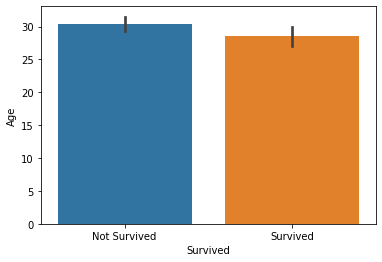

In [22]:
sns.barplot(x = df["Survived"],y = df["Age"])
plt.show()

### Handling Outliers

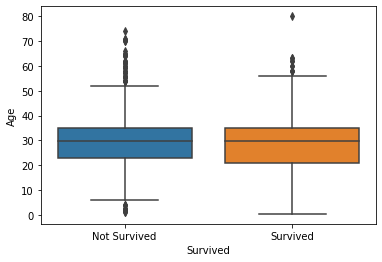

In [23]:
sns.boxplot(x = "Survived",y = "Age",data = df)
plt.show()

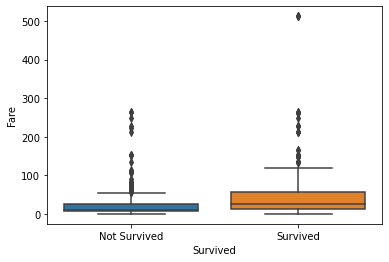

In [24]:
sns.boxplot(x = "Survived",y ="Fare",data = df )
plt.show()

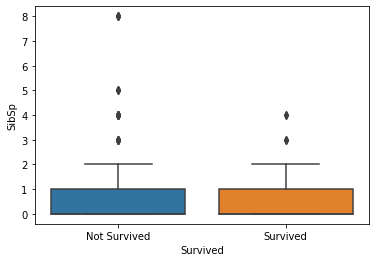

In [25]:
sns.boxplot(x = "Survived",y = "SibSp",data = df)
plt.show()

In [26]:
max_age = df["Age"].quantile(0.94)
max_age

52.0

In [27]:
min_age = df["Age"].quantile(0.06)
min_age

8.399999999999999

In [28]:
df = df[(df["Age"]<max_age) &(df["Age"]>min_age)]

In [29]:
df.shape

(780, 12)

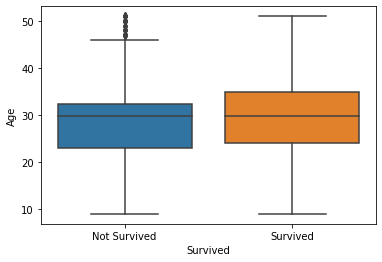

In [30]:
sns.boxplot(x = "Survived",y = "Age",data = df)
plt.show()

In [31]:
max_Fare = df["Fare"].quantile(0.95)
max_Fare

111.00288499999989

In [32]:
min_Fare = df["Fare"].quantile(0.05)
min_Fare

7.125

In [33]:
df = df[(df["Fare"]<max_Fare) &(df["Fare"]>min_Fare)]
df.shape

(700, 12)

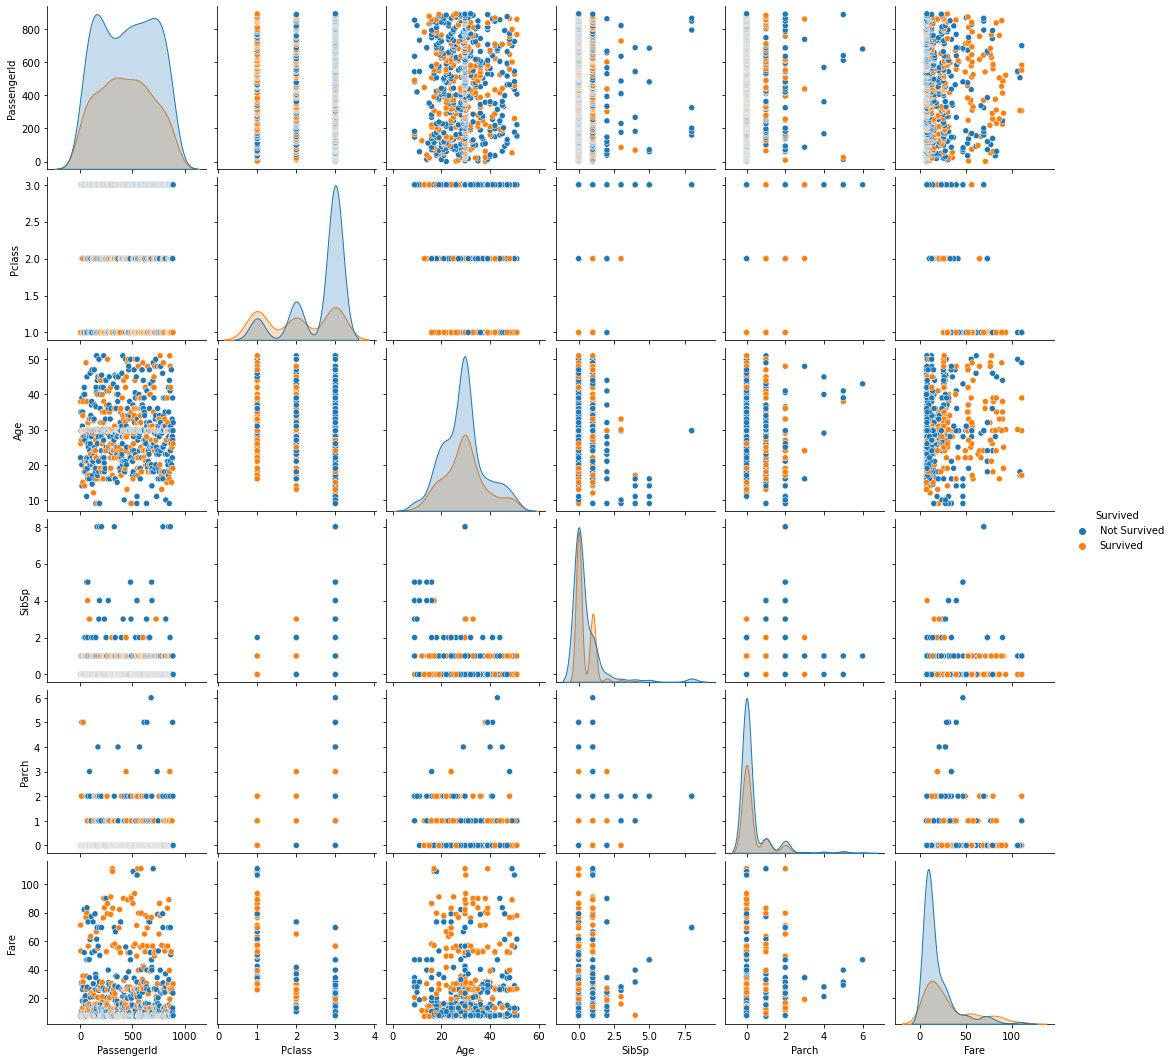

In [34]:
sns.pairplot(df,hue = "Survived")
plt.show()

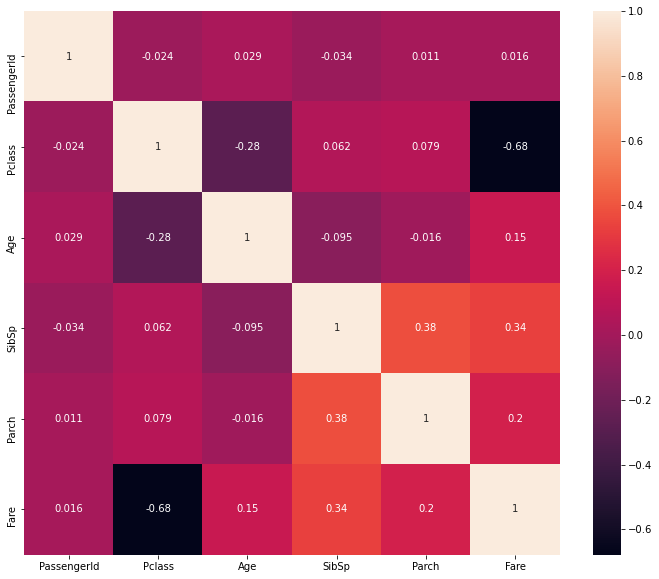

In [35]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot =True)
plt.show()

In [36]:
df["FamilySize"] = df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0


In [37]:
df.drop(["Parch","SibSp"],axis = 1,inplace= True)

Label Encoder for Sex, Embarked and Survived Columns

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Survived"] = le.fit_transform(df["Survived"])
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,G6,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,G6,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,G6,2,0


In [39]:
X = df[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]
Y = df["Survived"]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 1)

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [42]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[145,  30],
       [ 28,  77]], dtype=int64)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7928571428571428